# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ruster import Ruster
import sys
import os


# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [2]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

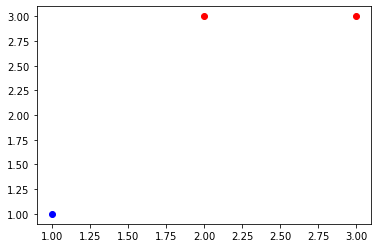

<Figure size 432x288 with 0 Axes>

In [3]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

[-0.9695444  -0.6281204  -0.33305907]


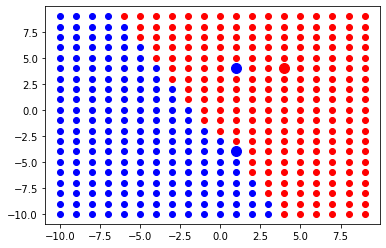

[-0.92154455 -0.58012056 -0.14105909]


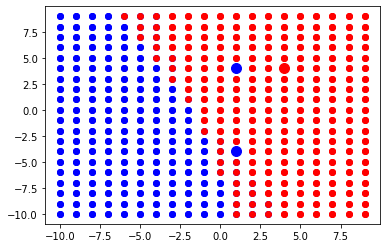

[-0.8735447  -0.5321207   0.05094093]


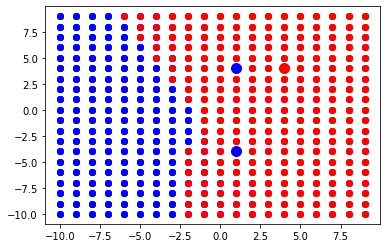

[-0.8375448  -0.49612078  0.19494094]


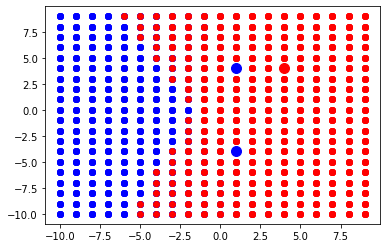

[-0.8015449  -0.4601207   0.33894092]


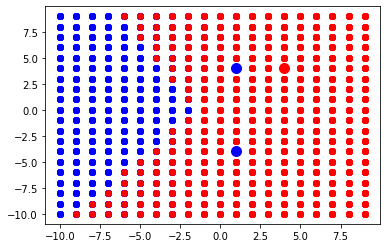

[-0.8015449  -0.4601207   0.33894092]


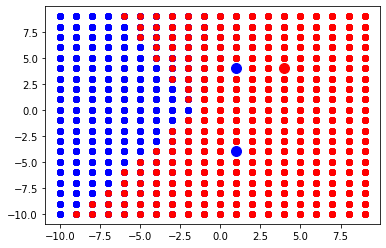

[-0.8015449  -0.4601207   0.33894092]


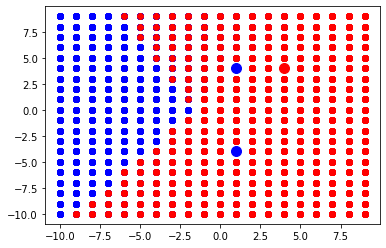

[-0.8015449  -0.4601207   0.33894092]


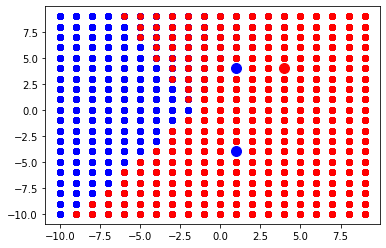

[-0.8015449  -0.4601207   0.33894092]


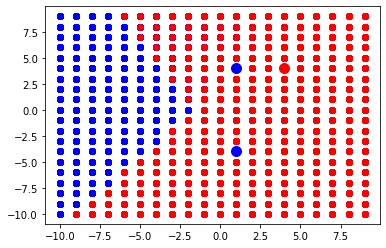

[-0.8015449  -0.4601207   0.33894092]


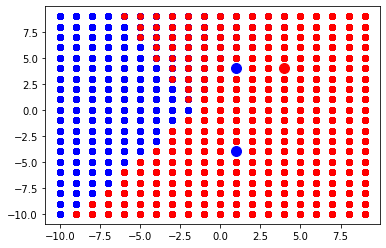

[-0.8015449  -0.4601207   0.33894092]


In [18]:
points_x1_blue = []
points_x2_blue = []
points_x1_red = []
points_x2_red = []

r = Ruster(path="C:\\Users\\Revive\\CLionProjects\\PerceptronLib\\target\\debug\\PerceptronLib.dll")

X = np.array([
      [1, 4],
      [1, -4],
      [4, 4],
])

model_size = 2
native_model = r.create_linear_model(model_size)
model = r.npify_native_model(native_model, model_size+1)
print(model)

# inputs = np.array([0, 0], float)
for _ in range(10):
    for i in range(-10, 10):
        for j in range(-10, 10):
            predict = r.predict_linear_model_classification(native_model, np.array([i, j], float), (model_size+1))
            if predict == 1.0:
                points_x1_blue.append(i)
                points_x2_blue.append(j)
            elif predict == -1.0:
                points_x1_red.append(i)
                points_x2_red.append(j)

    plt.scatter(points_x1_blue, points_x2_blue, c='blue')
    plt.scatter(points_x1_red, points_x2_red, c='red')
    plt.scatter([p[0] for p in X[:2]], [p[1] for p in X[:2]], c='blue', s=100)
    plt.scatter([p[0] for p in X[2:]], [p[1] for p in X[2:]], c='red', s=100)
    plt.show()

    inputs_for_train = []
    for elt in X:
        inputs_for_train.append(elt[0])
        inputs_for_train.append(elt[1])
    
    r.train_rosenblatt_linear_model(native_model, inputs_for_train, Y, model_size+1, 20, 0.003)
    model = r.npify_native_model(native_model, model_size+1)
    print(model)

r.destroy_linear_model(native_model, model_size)

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [4]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

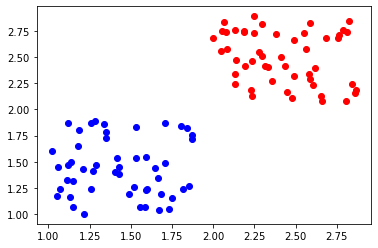

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [6]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

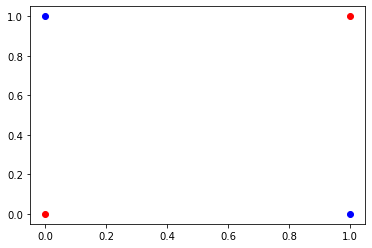

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [8]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

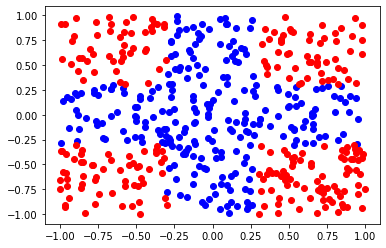

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [10]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

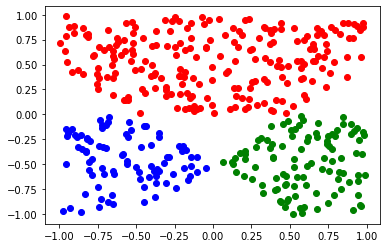

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [12]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

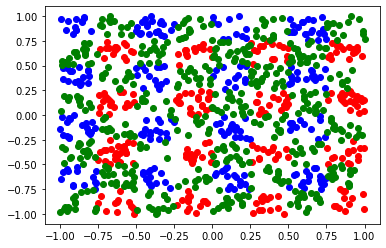

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [14]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

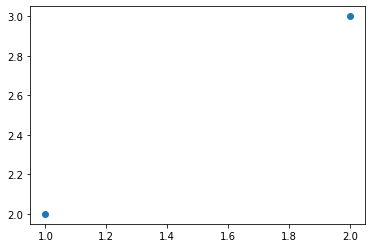

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [16]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

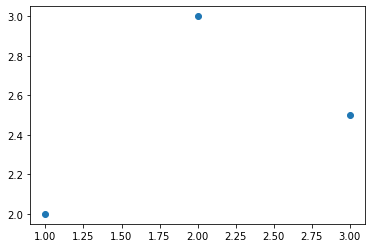

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [18]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

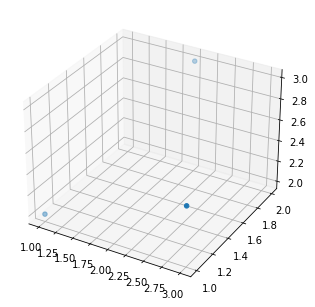

<Figure size 432x288 with 0 Axes>

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [20]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

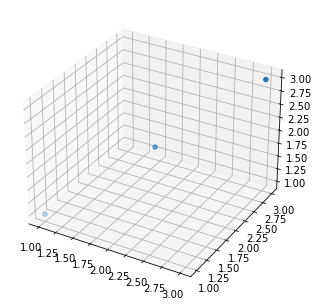

<Figure size 432x288 with 0 Axes>

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [22]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

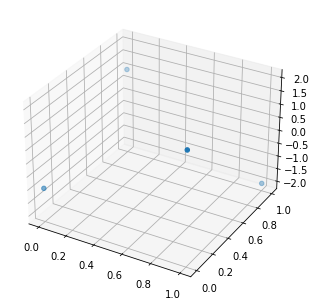

<Figure size 432x288 with 0 Axes>

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()